<a href="https://colab.research.google.com/github/ZiqiLi379/STATS-302-Intro-to-ML/blob/main/STATS302_Week_1_NBA_Players_Analysis_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 1 - NBA Players Analysis using Linear Regression
###STATS 302 Principle of Machine Learning
###Duke Kunshan University

<br><b>Topics covered in this tutorial:</b>
   
*   Importing data from Google Sheets into Colab
*   Basic data cleaning / analysis
*   Spliting data into test and training sets
*   Training a single variable regression model
*   Training a multivariate regression model
*   Manually calculating Adjusted R-squared and R-squared
*   Calculating Root Mean Square Error
*   Comparing results of 2 regression models


<br>Data is from [Kaggle](https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv). I've uploaded the data to Google Drive so you can easily access the data. Add the files below to your Drive, copy the notebook to your drive, and you'll be able to run the code on your own!


Files used for analysis:
* [Season stats](https://docs.google.com/spreadsheets/d/17azFbChyzImiEL9lYSu9LNLTTw_KBvI_yteYPYcsArw/edit#gid=1702307414)

* [Player data](https://docs.google.com/spreadsheets/d/15tFxdjFqjYxVhl7VxL95JOkhKEp8c1Saevj4YfXksIw/edit#gid=1473318657)


Helpful Readings:
* [measures of model fit for linear regression models](https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/)

* [Explainations on NBA dataset attributes(in English & Chinese)](https://zhuanlan.zhihu.com/p/36187480)

    
<hr>

<br><b>Project introduction:</b>

Dataset: NBA Players stats since 1950

(3000+ Players over 60+ Seasons, and 50+ features per player)

The data-set contains aggregate individual statistics for 67 NBA seasons. from basic box-score attributes such as points, assists, rebounds etc., to more advanced money-ball like features such as Value Over Replacement.
<br><br>

What we are going to do:

1. Create a linear regression model using points per game to estimate win shares per 48 minutes.
2. Create a linear regression model using points per game, total rebounds per game, and assists per game to estimate win shares per 48 minutes.
3. Compare results of 2 regression models.

    

## Importing and cleaning data


<br>
Importing packages

In [1]:
# Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(color_codes = True)

# Setting figure sizes
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

<br><br>
If using Google Colab

Connecting Google Drive to Colab so we can import data

In [ ]:
# # Code to connect Colab to Google Drive (save the spreadsheet provided into your drive)
# # https://colab.research.google.com/notebooks/io.ipynb#scrollTo=JiJVCmu3dhFa

# !pip install --upgrade -q gspread

# ## Method 1:
# # from google.colab import auth
# # auth.authenticate_user()

# # import gspread
# # from oauth2client.client import GoogleCredentials

# # gc = gspread.authorize(GoogleCredentials.get_application_default())

# ## Method 2:
# from google.colab import auth
# auth.authenticate_user()

# import gspread
# from google.auth import default
# creds, _ = default()

# gc = gspread.authorize(creds)

<br><br>

Importing data from Google Sheets into a dataframe in Colab

In [ ]:
### Importing sheet

# # Open our new sheet and read some data.
# worksheet = gc.open('Seasons_Stats').sheet1
# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# # Convert to a DataFrame and render.
# seasonPlayerStats = pd.DataFrame.from_records(rows)


# ### Fixing header of dataframe

# our header isn't named correctly lets fix our header
seasonPlayerStats.columns = seasonPlayerStats.iloc[0]
#drop the first row after we rename the header
seasonPlayerStats = seasonPlayerStats.reindex(seasonPlayerStats.index.drop(0))
seasonPlayerStats.head()

,,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
1,0,1950,Curly Armstrong,G-F,31,FTW,63,,,,...,0.705,,,,176,,,,217,458
2,1,1950,Cliff Barker,SG,29,INO,49,,,,...,0.708,,,,109,,,,99,279
3,2,1950,Leo Barnhorst,SF,25,CHS,67,,,,...,0.698,,,,140,,,,192,438
4,3,1950,Ed Bartels,F,24,TOT,15,,,,...,0.559,,,,20,,,,29,63
5,4,1950,Ed Bartels,F,24,DNN,13,,,,...,0.548,,,,20,,,,27,59


In [11]:
seasonPlayerStats = pd.read_excel(r"D:\Files\Year 4\S3\STATS 302\Codes\STATS-302-Intro-to-ML\Week_1_Data\Seasons_Stats.xlsx")

In [12]:
seasonPlayerStats.head()

,Unnamed: 0,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [13]:
seasonPlayerStats = seasonPlayerStats.drop(columns=["Unnamed: 0"])
seasonPlayerStats.head()

,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,TrueShootingPerct,...,FreeThrowPercentage,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,PersonalFouls,Points
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
# ### Importing sheet

# # Open our new sheet and read some data.
# worksheet = gc.open('player_data').sheet1
# # get_all_values gives a list of rows.
# rows = worksheet.get_all_values()
# # Convert to a DataFrame and render.
# playerData = pd.DataFrame.from_records(rows)
# playerData.head()

# ### Fixing header of dataframe
# #rename header so it's the first row
# playerData.columns = playerData.iloc[0]
# #drop the first row after we rename the header
# playerData = playerData.reindex(playerData.index.drop(0))
# playerData.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
1,Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
2,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
3,Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
4,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
5,Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University


In [15]:
playerData = pd.read_excel(r"D:\Files\Year 4\S3\STATS 302\Codes\STATS-302-Intro-to-ML\Week_1_Data\player_data.xlsx")
playerData.head()

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,2019-06-10 00:00:00,240.0,1968-06-24,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,2019-06-09 00:00:00,235.0,1946-04-07,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,2019-07-02 00:00:00,225.0,1947-04-16,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,2019-06-01 00:00:00,162.0,1969-03-09,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,2019-06-06 00:00:00,223.0,1974-11-03,San Jose State University


<br>
<br>
Merging dataframes and dropping null values so we avoid errors

In [17]:
# joining
playerAllStats = pd.merge(seasonPlayerStats, playerData, how='left', on='Player')  # Keep every row from seasonPlayerStats
playerAllStats

,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,TrueShootingPerct,...,Turnovers,PersonalFouls,Points,year_start,year_end,position,height,weight,birth_date,college
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,217.0,458.0,1949.0,1951.0,G-F,2019-05-11 00:00:00,170.0,1918-11-01,Indiana University
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,99.0,279.0,1950.0,1952.0,G,2019-06-02 00:00:00,185.0,1921-01-15,University of Kentucky
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,192.0,438.0,1950.0,1954.0,F-G,2019-06-04 00:00:00,190.0,1924-05-11,University of Notre Dame
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,29.0,63.0,1950.0,1951.0,F,2019-06-05 00:00:00,195.0,1925-10-08,North Carolina State University
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,27.0,59.0,1950.0,1951.0,F,2019-06-05 00:00:00,195.0,1925-10-08,North Carolina State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25292,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,65.0,189.0,639.0,2014.0,2018.0,C-F,7-0,240.0,1992-10-05,Indiana University
25293,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,20.0,61.0,178.0,2013.0,2018.0,F-C,7-0,253.0,1990-01-17,University of North Carolina
25294,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,3.0,17.0,23.0,2017.0,2017.0,C,7-0,240.0,1996-09-09,"University of Nevada, Las Vegas"
25295,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,40.0,78.0,240.0,2017.0,2018.0,G-F,2019-06-08 00:00:00,215.0,1994-02-18,NaN


In [18]:
# dropping null value rows for 'height', 'Points', and 'Games'
playerAllStats = playerAllStats[pd.notnull(playerAllStats['height'])]
playerAllStats = playerAllStats[pd.notnull(playerAllStats['Points'])]
playerAllStats = playerAllStats[pd.notnull(playerAllStats['Games'])]
playerAllStats

,Year,Player,Position,Age,Team,Games,GamesStarted,MinutesPlayed,PlayerEfficiencyRating,TrueShootingPerct,...,Turnovers,PersonalFouls,Points,year_start,year_end,position,height,weight,birth_date,college
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,217.0,458.0,1949.0,1951.0,G-F,2019-05-11 00:00:00,170.0,1918-11-01,Indiana University
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,99.0,279.0,1950.0,1952.0,G,2019-06-02 00:00:00,185.0,1921-01-15,University of Kentucky
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,192.0,438.0,1950.0,1954.0,F-G,2019-06-04 00:00:00,190.0,1924-05-11,University of Notre Dame
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,29.0,63.0,1950.0,1951.0,F,2019-06-05 00:00:00,195.0,1925-10-08,North Carolina State University
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,27.0,59.0,1950.0,1951.0,F,2019-06-05 00:00:00,195.0,1925-10-08,North Carolina State University
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25292,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,65.0,189.0,639.0,2014.0,2018.0,C-F,7-0,240.0,1992-10-05,Indiana University
25293,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,20.0,61.0,178.0,2013.0,2018.0,F-C,7-0,253.0,1990-01-17,University of North Carolina
25294,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,3.0,17.0,23.0,2017.0,2017.0,C,7-0,240.0,1996-09-09,"University of Nevada, Las Vegas"
25295,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,40.0,78.0,240.0,2017.0,2018.0,G-F,2019-06-08 00:00:00,215.0,1994-02-18,NaN


<br>
<br>Viewing all columns that we have in the dataframe. I'll be referencing this figure out which fields I need to clean

In [19]:
playerAllStats.columns  # All the column names

Index(['Year', 'Player', 'Position', 'Age', 'Team', 'Games', 'GamesStarted',
       'MinutesPlayed', 'PlayerEfficiencyRating', 'TrueShootingPerct',
       'ThreePointAttemptRate', 'FreeThrowRate', 'OffensiveReboundPercentage',
       'DefensiveReboundPercentage', 'TotalReboundPercentage',
       'AssistPercentage', 'StealPercentage', 'BlockPercentage',
       'TurnoverPercentage', 'UsagePercentage', 'blanl', 'OffesniveWinShares',
       'DefensiveWinShares', 'WinShares', 'WinsSharesPer48Minutes', 'blank2',
       'OffensiveBoxPlusMinus', 'DefensiveBoxPlusMinus', 'BoxPlusMinus',
       'ValueOverReplacement', 'FieldGoals', 'FieldGoalAttempts',
       'FieldGoalPercentage', 'ThreePointFieldGoals',
       'ThreePointFieldGoalAttempts', 'ThreePointFieldGoalPercentage',
       'TwoPointFieldGoals', 'TwoPointFieldGoalAttempts',
       'TwoPointFieldGoalPercentage', 'EffectiveFieldGoalPercentage',
       'FreeThrows', 'FreeThrowAttempts', 'FreeThrowPercentage',
       'OffensiveRebounds', 'De

<br>
<br>
Cleaning data even more


*   Convering height to inches (so we can use it if we decide to)
*   Converting some of the stats to a numeric value so we can do analysis
*   Calculating points per game, total rebounds per game, and assists per game



In [ ]:
# converting player stats to usable formats and doing some minor calculations

playerAllStats['feet'], playerAllStats['inches'] = playerAllStats['height'].str.split('-', 1).str
playerAllStats['feet'], playerAllStats['inches'], playerAllStats['weight'] = pd.to_numeric(playerAllStats.feet), \
  pd.to_numeric(playerAllStats.inches), pd.to_numeric(playerAllStats.weight)
playerAllStats['heightInches'] = playerAllStats['feet']*12 + playerAllStats['inches']

playerAllStats['Games'], playerAllStats['Points'] = pd.to_numeric(playerAllStats.Games), pd.to_numeric(playerAllStats.Points)
playerAllStats['MinutesPlayed'], playerAllStats['FieldGoalPercentage']= pd.to_numeric(playerAllStats.MinutesPlayed), pd.to_numeric(playerAllStats.FieldGoalPercentage)
playerAllStats['Games'], playerAllStats['TotalRebounds']= pd.to_numeric(playerAllStats.Games), pd.to_numeric(playerAllStats.TotalRebounds)
playerAllStats['Assists'], playerAllStats['WinsSharesPer48Minutes']= pd.to_numeric(playerAllStats.Assists), pd.to_numeric(playerAllStats.WinsSharesPer48Minutes)
playerAllStats['WinShares'], playerAllStats['Year'] = pd.to_numeric(playerAllStats.WinShares), pd.to_numeric(playerAllStats.Year)


playerAllStats['PointsPerGame'] = playerAllStats['Points']/ playerAllStats['Games']
playerAllStats['TotalReboundsPerGame'] = playerAllStats['TotalRebounds']/ playerAllStats['Games']
playerAllStats['AssistsPerGame'] = playerAllStats['Assists']/ playerAllStats['Games']

playerAllStats.head()


TypeError: StringMethods.split() takes from 1 to 2 positional arguments but 3 were given

<br>
##Question: Can we create a linear regression model using points per game to estimate win shares per 48 minutes?

What is WS/48 -- Win Shares Per 48 Minutes?

An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)


<br>

<b>1. Create a plot with the 2 statistics</b><br>
Before we create the model, let's plot the points per game vs win shares per 48 minutes. This will let us understand the data set and see if we need to remove outliers to improve model accuracy.

<Axes: xlabel='WinsSharesPer48Minutes', ylabel='PointsPerGame'>

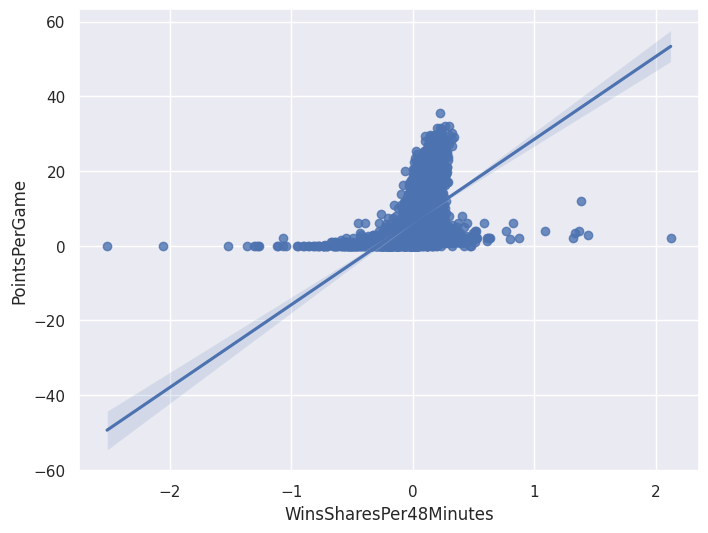

In [ ]:
sns.regplot(x="WinsSharesPer48Minutes", y = "PointsPerGame", data=playerAllStats)

There's obviously some outliers and data that doesn't below. Let's see what kind of data we're working with.

In [ ]:
playerAllStats.describe()

,Year,Games,MinutesPlayed,WinShares,WinsSharesPer48Minutes,FieldGoalPercentage,TotalRebounds,Assists,Points,weight,feet,inches,heightInches,PointsPerGame,TotalReboundsPerGame,AssistsPerGame
count,23468.000000,23468.000000,23025.000000,23434.000000,22993.000000,23367.000000,23176.000000,23468.000000,23468.000000,23463.000000,23466.000000,23466.000000,23466.000000,23468.000000,23176.000000,23468.000000
mean,1993.687191,49.584029,1134.990445,2.166566,0.059907,0.428937,203.974672,105.379069,461.174791,212.260154,6.045300,6.007756,78.551351,7.682857,3.470154,1.773789
std,16.959728,26.626993,902.531225,2.649752,0.102723,0.097674,201.148338,126.308775,444.178918,26.259078,0.289665,3.342235,3.618739,5.483222,2.510461,1.698889
min,1950.000000,1.000000,0.000000,-2.800000,-2.519000,0.000000,0.000000,0.000000,0.000000,133.000000,5.000000,0.000000,63.000000,0.000000,0.000000,0.000000
25%,1983.000000,26.000000,307.000000,0.100000,0.028000,0.391000,46.000000,17.000000,94.000000,190.000000,6.000000,3.000000,76.000000,3.397000,1.631579,0.600000
50%,1997.000000,55.000000,969.000000,1.200000,0.072000,0.437000,146.000000,62.000000,329.000000,212.000000,6.000000,6.000000,79.000000,6.335417,2.830969,1.250000
75%,2008.000000,75.000000,1833.000000,3.400000,0.109000,0.479000,296.000000,146.000000,710.000000,230.000000,6.000000,9.000000,81.000000,10.876920,4.666667,2.400610
max,2017.000000,87.000000,3638.000000,20.300000,2.123000,1.000000,1288.000000,1099.000000,2832.000000,360.000000,7.000000,11.000000,91.000000,35.400000,18.000000,13.402439


There's a few things I see immediately that would make our data hard to plot.

1. We have seasons from 1950...to minimize noise, we're only going to look at recent player's seasons. So I'm going to limit my analysis from 2014 to present.<br><br>
2. We have players who've played 1 game all season. We're also going to limit the number of games a player has played in a given season to be >70% of all games. A given season has 82 games.<br><br>
3. This isn't in the descriptive statistics above, but there are different positions in basketball. For the purpose of this analysis let's limit our data to include players who play Point Guard (PG) (or other positions along with PG). These are typically the players who score the most points, and it makes sense for us to group players who have even scoring potential to reduce skewness.

In [ ]:
#filtering on players who have played since 2014 and have played at least 70% of the games in a given season (assuming 82 games per season)
playerAllStatsSince2014 = playerAllStats.loc[(playerAllStats['Year'] >= 2014) &(playerAllStats['Games'] >= 58)]
#filteirng on PG players
playerAllStatsSince2014PG = playerAllStatsSince2014[playerAllStatsSince2014['Position'].str.contains('PG')].reset_index(drop=True)


<Axes: xlabel='WinsSharesPer48Minutes', ylabel='PointsPerGame'>

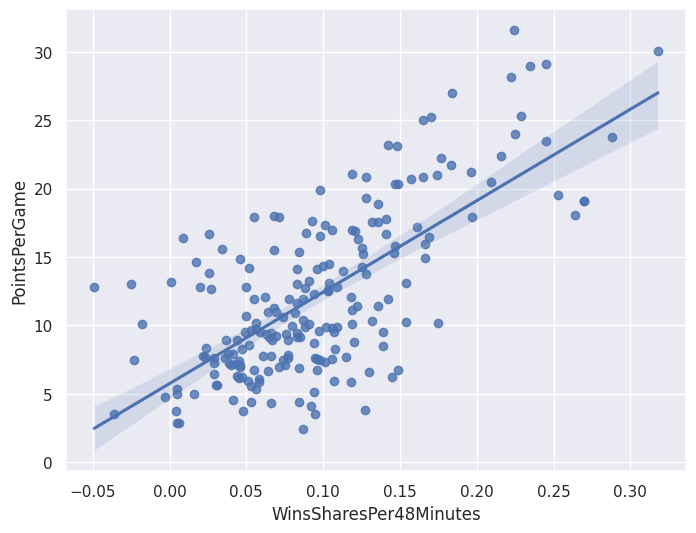

In [ ]:
sns.regplot(x="WinsSharesPer48Minutes", y = "PointsPerGame", data=playerAllStatsSince2014PG)

<br>The plot looks much better between points per game vs win shares per 48 minutes. Our data is in a format we can use. Let's move on to creating a training and test data set.


<br>
<br>
<b>2. Splitting data into training and test set</b>
<br>
We're going to split our data into dependent variables and an independent varaibles for both training and test sets using SKLearn's train_test_split function.

In [ ]:
playerAllStatsSince2014PG_WinShare = playerAllStatsSince2014PG['WinsSharesPer48Minutes']
playerAllStatsSince2014PG_PPG = playerAllStatsSince2014PG['PointsPerGame']

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(playerAllStatsSince2014PG['PointsPerGame'], \
                                                    playerAllStatsSince2014PG['WinsSharesPer48Minutes'], test_size=0.20, random_state=42)

<br><br>
<b>3. Fitting the data to a linear regression and getting R-squared</b><br>
Here we're creating a linear regression model called model_1. We're going to fit the training data to this model. After that we're going to get the R-squared value. R-squared is a value between 0 and 1 which is a statistical measure of how close the data are to the fitted regression line. 1 = perfect fit, 0 = no fit

In [ ]:
model_1 = LinearRegression()
model_1.fit(train_x.values.reshape(-1, 1), train_y.values.reshape(-1, 1))
model_1.score(train_x.values.reshape(-1, 1), train_y.values.reshape(-1, 1))

0.4963207248494391

A r-squared of 0.496 tells us we have a moderately effective fit. Since we're also going to be creating a multi-variate model, let's also calculate Adjusted R-squared and Root Mean Square Error (RMSE) so we have more statistics to compare.

The below code calculates R-squared and Adjusted R-squared.

In [ ]:
X = train_x.values.reshape(-1, 1)
y = train_y.values.reshape(-1, 1)

# compute with formulas from the theory
yhat = model_1.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - np.divide(SS_Residual,SS_Total)
#r_squared = 1 - np.exp((float(SS_Residual))/SS_Total)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

[0.49632072] [0.49326812]


<br><br>
<b>4. Estimate values for the test data</b> <br>
Last thing to do is to estimate Win Shares with our test data. We'll compare our estiamte to the true values and cacluate the Root Mean Square Error.

In [ ]:
model_1_predict_values = model_1.predict(test_x.values.reshape(-1, 1))

In [ ]:
model_1_predict = pd.DataFrame({'Points Per Game': test_x.values, 'Actual Win Share': test_y.values,'Predicted Win Share': model_1_predict_values.reshape(1, -1)[0]})

 <br>
 The code below calcualte Root Mean Square Error. The lower the Root Mean Square Error the closer our estimations are to the real values.

In [ ]:
#Root Mean square error on test dataset
np.sqrt(np.mean(np.square(model_1_predict['Actual Win Share'] - \
                         model_1_predict['Predicted Win Share'])))

0.0523034857831081

<br>
##Question: Can we create a linear regression model using points per game, total rebounds per game, and assists per game to estimate win shares per 48 minutes?
<br>
We'll go through the same process as above (less the data exploration, which we do not need to do 2 times). We'll create the model and generate the statistics. Then we'll comapre the single variable to the multivariable model.

In [ ]:
playerAllStatsSince2014PG_Ys = playerAllStatsSince2014PG['WinsSharesPer48Minutes']
playerAllStatsSince2014PG_Xs = playerAllStatsSince2014PG[['PointsPerGame', 'TotalReboundsPerGame', 'AssistsPerGame']]

In [ ]:
#splitting test and training data
train_x, test_x, train_y, test_y = train_test_split(playerAllStatsSince2014PG_Xs, playerAllStatsSince2014PG_Ys, test_size=0.20, random_state=42)

In [ ]:
#fitting model
model_1 = LinearRegression()
model_1.fit(train_x, train_y)
model_1.score(train_x, train_y)


0.5060498809063979

<br>
It looks like this model's R-square value is already higher that our single variable. Next we'll calculate the model's estimate for Win Shares.

In [ ]:
model_1_predict_values = model_1.predict(test_x)

In [ ]:
model_1_predict = pd.DataFrame({'Actual Win Share': test_y.values,'Predicted Win Share': model_1_predict_values.reshape(1, -1)[0]})

In [ ]:
#Root Mean square error on test dataset
np.sqrt(np.mean(np.square(model_1_predict['Actual Win Share'] - \
                         model_1_predict['Predicted Win Share'])))

0.05174714479057623

In [ ]:
X = train_x.values
y = train_y.values

# compute with formulas from the theory
yhat = model_1.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - np.divide(SS_Residual,SS_Total)
#r_squared = 1 - np.exp((float(SS_Residual))/SS_Total)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5060498809063976 0.49695877442001224


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Comparing single variable to multi-variable linear regression model
Below is a summary of the test statistics of the two models we created.

 <table style="margin:1em auto" class="dataframe">
    <thead>
      <tr style="text-align: right;">
        <th>statistic</th>
        <th>single</th>
        <th>multi</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>r-squared</td>
        <td>0.49632</td>
        <td>0.50604</td>
      </tr>
      <tr>
        <td>adjusted r-squared</td>
        <td>0.49326</td>
        <td>0.49695</td>
      </tr>
       <tr>
        <td>RMSE</td>
        <td>0.0523</td>
        <td>0.0517</td>
      </tr>
     
     
  
  </table>
  <br>
  
Across all 3 statistics, the multivariate model performs slightly better than the single variable.